Import

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/nehajoshi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nehajoshi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/nehajoshi/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /Users/nehajoshi/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nehajoshi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
df = pd.read_csv('Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df['Text'].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [7]:
print(df.shape)

(568454, 10)


EDA

In [8]:
df['Score'].value_counts()

# alot fo 5 star ratings

Score
5    363122
4     80655
1     52268
3     42640
2     29769
Name: count, dtype: int64

Text(0.5, 0, 'Star Reviews')

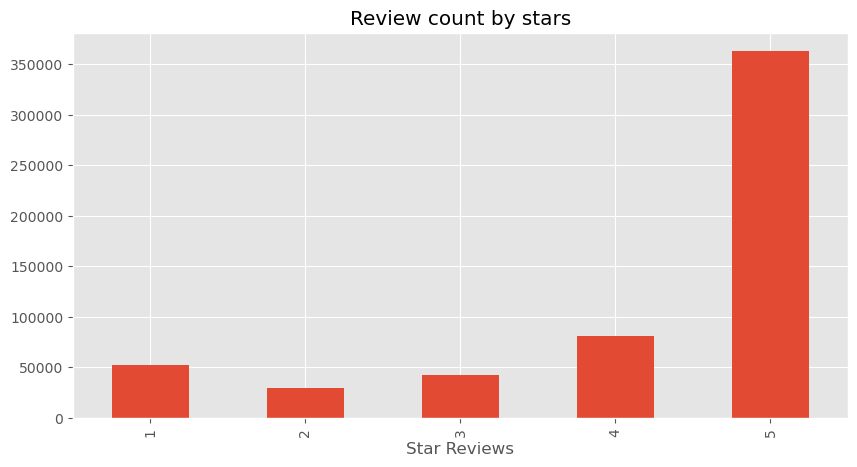

In [9]:
ax = df['Score'].value_counts().sort_index().\
plot(kind = 'bar', title = 'Review count by stars', \
     figsize=(10,5))

ax.set_xlabel('Star Reviews')

In [10]:
# data biased towards positive reviews

NLTK Exploration

In [11]:
ex = df['Text'][50]
print(ex)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [12]:
tokens = nltk.word_tokenize(ex)
tokens[10:]

[',',
 'I',
 'do',
 "n't",
 'like',
 'it',
 '.',
 'Quaker',
 'Oats',
 'is',
 'the',
 'way',
 'to',
 'go',
 '.']

In [13]:
# getting part of speech of each token
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

In [14]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


# VANDER Sentiment Scoring

In [15]:
# in this method, stop words are removed and each word is given a total score
# relationship between word sin sentence is nt considered

In [16]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [17]:
sia.polarity_scores('I am extremely depressed')

{'neg': 0.642, 'neu': 0.358, 'pos': 0.0, 'compound': -0.5563}

In [18]:
# now getting polarity scores for each text in our amazon reviews and assigning pos, neg and neutral scors to df
pScores = {}
for i, r in tqdm(df.iterrows(), total = len(df)):
    thisText = r['Text']
    thisId = r['Id']
    pScores[thisId] = sia.polarity_scores(thisText)


  0%|          | 0/568454 [00:00<?, ?it/s]

In [19]:
pd.DataFrame(pScores).T

,neg,neu,pos,compound
1,0.000,0.695,0.305,0.9441
2,0.138,0.862,0.000,-0.5664
3,0.091,0.754,0.155,0.8265
4,0.000,1.000,0.000,0.0000
5,0.000,0.552,0.448,0.9468
...,...,...,...,...
568450,0.072,0.600,0.327,0.8589
568451,0.190,0.697,0.114,-0.4848
568452,0.037,0.884,0.078,0.4352
568453,0.041,0.506,0.452,0.9717


In [21]:
vaders = pd.DataFrame(pScores).T
vaders = vaders.reset_index().rename(columns = {'index':'Id'})
vaders = vaders.merge(df, how = 'left')
vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


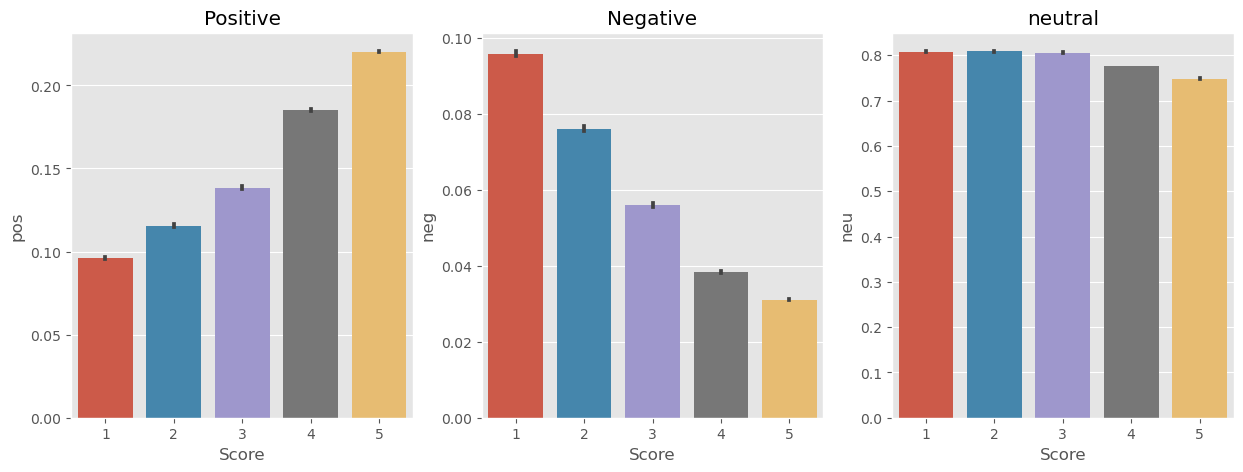

In [22]:
fig, axs = plt.subplots(1, 3, figsize = (15,5))
sns.barplot(data = vaders, x = 'Score', y= 'pos', ax = axs[0])
sns.barplot(data = vaders, x = 'Score', y= 'neg', ax = axs[1])
sns.barplot(data = vaders, x = 'Score', y= 'neu', ax = axs[2])

axs[0].set_title('Positive')
axs[1].set_title('Negative')
axs[2].set_title('neutral')

plt.show()

In [23]:
# Analysis:
#   1. more the star rating -> more are the positive reviews 
#   2. lesser the star rating -> negative are the reviews

# Roberta pretrained model

In [ ]:
# this model considers the context ad relationships between words in a sentence
# transformer based model

In [24]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

In [25]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [26]:
print(ex)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [27]:
sia.polarity_scores(ex)

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [37]:
def polarity_scores_roberta(ex):
    encoded = tokenizer(ex, return_tensors = 'pt')
    output = model(**encoded)
    score = output[0][0].detach().numpy()
    scores = softmax(score)
    scores_dict = {'neg_roberta': scores[0], 'neg_roberxa': scores[1],'neg_roberta': scores[2]}
    return scores_dict


In [ ]:
vader_result, roberta_result, vader_result_named, overall_result = {}, {}, {}, {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
        thisText = row['Text']
        thisId = row['Id']
        vader_result[thisId] = sia.polarity_scores(thisText)
        for key, value in vader_result.items():
            vader_result_named[f"vader_{key}"] = value

        roberta_result[thisId] = polarity_scores_roberta(thisText)
        both = {**vader_result_named, **roberta_result}
        overall_result[thisId] = both
    except RuntimeError:
        print(f'Broke for Id {thisId}')

In [ ]:
# above is very slow as the transformer models are to be run on GPU!

In [ ]:
overall_results_df = pd.DataFrame(overall_result).T
overall_results_df = overall_results_df.reset_index().rename(columns = {'index':'Id'})
overall_results_df = overall_results_df.merge(df, how = 'left')
overall_results_df.head()

In [ ]:
sns.pairplot(data=overall_results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'neg_roberta', 'neu_roberta', 'pos_roberta'],
            hue='Score',
            palette='tab10')
plt.show()

In [48]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [51]:
sentiment_pipeline('amazing weather but too much water!!!')

[{'label': 'NEGATIVE', 'score': 0.8401699662208557}]

In [52]:
sentiment_pipeline('okay weather but too much water!!!')

[{'label': 'NEGATIVE', 'score': 0.9870567917823792}]

In [53]:
sentiment_pipeline('I like the weather but its humid!')

[{'label': 'POSITIVE', 'score': 0.9836270809173584}]

In [54]:
# end